Activity 2.3
The iris dataset is back again (it's very helpful!) - perform the same task as in 2.1 and compare this model with our k-means clustering model. Which model is more accurate? Which is most intepretable?

In [195]:
#Import libaries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn import datasets
from sklearn.neighbors import NearestCentroid
from sklearn.neighbors import KNeighborsClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import classification_report
from sklearn import metrics

In [196]:
#lets start with k-nearest neighbors algorithm (k-NN), using decision boundary mesh to aid the visual output

In [197]:
iris = datasets.load_iris() #Dataset we are using

In [198]:
X = iris.data[:,(0,2)]
#X holds two cols, Sepal.Length and Petal.Length which showed good association before

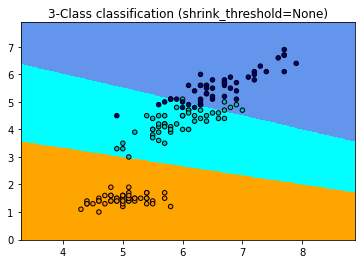

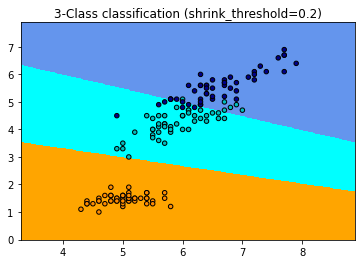

In [199]:
#We have x data now y
y = iris.target #The correct label of y 

n_neighbors = 15 #setting nearest neighbor to
h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])

for shrinkage in [None, .2]:
    # we create an instance of Neighbours Classifier and fit the data.
    clf = NearestCentroid(shrink_threshold=shrinkage)
    clf.fit(X, y)
    y_pred = clf.predict(X)
    
    #print(shrinkage, np.mean(y == y_pred))
    #Now prepare the mesh
    # Plot the decision boundary. For that, we will assign a color to each
    # point in the mesh [x_min, x_max]x[y_min, y_max].
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

    # Put the result into a color plot
    Z = Z.reshape(xx.shape)
    
    plt.figure()
    
    plt.pcolormesh(xx, yy, Z, cmap=cmap_light,shading='auto')

    # Plot also the training points
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    
    plt.title("3-Class classification (shrink_threshold=%r)"
              % shrinkage)
    
    plt.axis('tight')

plt.show()
#See the plots below


In [200]:
#lETS LOOK AT THE RESULTS ALSO IN NUMERICAL FORM
print(classification_report(y, y_pred))


              precision    recall  f1-score   support

           0       1.00      1.00      1.00        50
           1       0.81      0.86      0.83        50
           2       0.85      0.80      0.82        50

    accuracy                           0.89       150
   macro avg       0.89      0.89      0.89       150
weighted avg       0.89      0.89      0.89       150



In [201]:
#Use same data as above, Sepal.Length and Petal.Length which showed good association before

In [202]:
scores = []
trial_num_clus = 3
for i in range(1,trial_num_clus ):
    model = KMeans(n_clusters=i) #So we are running i clusters
    model.fit(X)
    
    # Score the model
    scores.append(model.score(X))

In [203]:
print(scores)

[-566.4937333333332, -112.99207175925923]


In [204]:
 model.inertia_

112.99207175925925

In [205]:
# How good is the results?
metrics.adjusted_rand_score(y,model.labels_)

0.5312290473980091

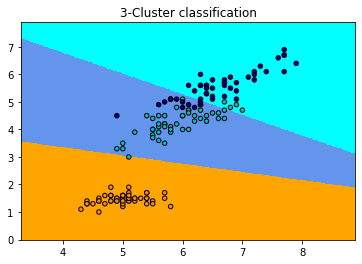

In [207]:
#We have x data now y
y = iris.target #The correct label of y 

h = .02  # step size in the mesh

# Create color maps
cmap_light = ListedColormap(['orange', 'cyan', 'cornflowerblue'])
cmap_bold = ListedColormap(['darkorange', 'c', 'darkblue'])


# we create an instance of KMeans Classifier and fit the data.
clf = KMeans(n_clusters=3)
clf.fit(X)
y_pred = clf.predict(X)
    
#print(shrinkage, np.mean(y == y_pred))
#Now prepare the mesh
# Plot the decision boundary. For that, we will assign a color to each
# point in the mesh [x_min, x_max]x[y_min, y_max].
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])

# Put the result into a color plot
Z = Z.reshape(xx.shape)
    
plt.figure()
    
plt.pcolormesh(xx, yy, Z, cmap=cmap_light,shading='auto')

# Plot also the training points
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=cmap_bold,
                edgecolor='k', s=20)
    
plt.title("3-Cluster classification")
    
plt.axis('tight')

plt.show()
#See the plots below

Neighbours Classifier gave the best numeric result of 0.89, KMeans returned 0.5312290473980091 with 3 cluster.
When comparing the devision boundary plots we can see nearest neighbours was more correct in placement